In [1]:
import os
from utilities import (extract_image_from_pdf, extract_xml_from_digital_pdf,
                       create_directory, read_directory_files, get_subdirectories,
                       get_string_xmltree, get_xmltree, get_specific_tags, get_page_texts_ordered,
                       get_page_text_element_attrib, get_ngram
                      )
from xml_document_info import (get_xml_info)

from box_horizontal_operations import (merge_horizontal_blocks)
from box_vertical_operations import (merge_vertical_blocks)

import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import copy

from box_horizontal_evalutions import (are_hlines, are_hlines_superscript)


## Draw the boxes on document pages

In [2]:
def draw_box(filepath, desired_width, desired_height, df, color="green", save=False):
    image  = Image.open(filepath)
    image  = image.resize((desired_width, desired_height))
    draw   = ImageDraw.Draw(image)
    
    for index, row in df.iterrows():
        left   = int(row['text_left'])
        right  = int(row['text_width'] + left)
        top    = int(row['text_top'])
        bottom = int(row["text_height"] + top)
        
        draw.rectangle(((left, top), (right,bottom)), outline=color)
    save_filepath = os.path.join(os.path.dirname(filepath), 'processed_' + os.path.basename(filepath))
    if save:
        image.save(save_filepath)
    
    return image

def show_df(df):
    return df.head(df.shape[0])

## start of program

In [15]:
base_dir   = '/Users/kd/Workspace/python/github/document-structure/data/'
input_dir  = os.path.join(base_dir, 'input')
output_dir = os.path.join(base_dir, 'output')
filename   = '20695_2010_8_1501_20635_Judgement_17-Feb-2020.pdf'


In [16]:
pdf_filepath   = os.path.join(input_dir, filename)
working_dir    = os.path.join(output_dir, os.path.splitext(filename)[0])

ret            = create_directory(working_dir)

pdf_image_dir  = extract_image_from_pdf(pdf_filepath, working_dir)
pdf_xml_dir    = extract_xml_from_digital_pdf(pdf_filepath, working_dir)

xml_files      = read_directory_files(pdf_xml_dir, pattern='*.xml')
# print(xml_files, "\n\n")
image_files    = read_directory_files(pdf_image_dir, pattern='*-*.jpg')
# print(image_files)
print("Extracted xml & images of file: %s" % (filename))

Extracted xml & images of file: 20695_2010_8_1501_20635_Judgement_17-Feb-2020.pdf


In [17]:
xml_dfs, page_width, page_height = get_xml_info(xml_files[0])

Total number of pages (54) in file (20695_2010_8_1501_20635_Judgement_17-Feb-2020.xml)


In [18]:
document_configs = {
    'LANGUAGE_TYPE': 'eng',
    
    'HORI_BLOCK_WDTH_DIFF_PERC': 0.85,
    'SUPERSCRIPT_HEIGHT_DIFFERENCE': 7.0,
    'HORI_SPACE_TOO_CLOSE': 10.0,
    
    'VERTICAL_SPACE_TOO_CLOSE': 5.0,
    'AVERAGE_VERTICAL_SPACE': 12.0,
    'LEFT_OR_RIGHT_ALIGNMENT_MARGIN': 20.0
}

In [37]:
file_index     = 2
img_filepath   = image_files[file_index]
df             = xml_dfs[file_index]


In [38]:
in_df   = df #.loc[10:30]

h_df    = merge_horizontal_blocks(in_df, document_configs, debug=False)
# v_df    = merge_vertical_blocks(h_df, document_configs, debug=False)

# draw_box(img_filepath, page_width, page_height, v_df, color='red')
show_df(h_df)


,xml_index,text_top,text_left,text_width,text_height,text,font_size,font_family,font_color,attrib,children
0,0,56,730,58,14,PART A,14,Arial,#000000,,None
1,1,1197,443,11,12,3,13,Arial,#000000,,None
2,2,112,108,297,17,A Background of the dispute,18,"Arial,Bold",#000000,NaN,"{""index"":{""0"":0,""1"":1},""attrib"":{""0"":"""",""1"":""""..."
3,4,176,108,682,17,1. A quest for equality of opportunity ...,18,Arial,#000000,NaN,"{""index"":{""0"":0,""1"":1},""attrib"":{""0"":"""",""1"":""""..."
4,6,215,108,682,22,Commissions 1 in the Indian Army forms ...,18,Arial,#000000,NaN,"{""index"":{""0"":0,""1"":1,""2"":2},""attrib"":{""0"":"""",..."
5,9,263,108,682,17,appeal originated in a batch of Writ Pe...,18,Arial,#000000,,None
6,10,306,108,319,17,High Court of Delhi in 2003 and 2006.,18,Arial,#000000,,None
7,11,392,108,682,17,2. A decade and more spent in litigatio...,18,Arial,#000000,NaN,"{""index"":{""0"":0,""1"":1},""attrib"":{""0"":"""",""1"":""""..."
8,13,431,108,681,21,Commissions 2 in the Army seek parity w...,18,Arial,#000000,NaN,"{""index"":{""0"":0,""1"":1,""2"":2},""attrib"":{""0"":"""",..."
9,16,478,108,682,17,PCs. The entry of women in the Army has a cheq...,18,Arial,#000000,,None


In [10]:
children_df = pd.read_json(h_df.iloc[4]['children'])
children_df


,attrib,font_color,font_family,font_size,index,text,text_height,text_left,text_top,text_width,xml_index
0,,#000000,Arial,18,0,Commissions,17,108,220,112,6
1,SUPERSCRIPT,#000000,Arial,12,1,1,11,221,215,7,7
2,,#000000,Arial,18,2,in the Indian Army forms the basis of...,17,227,220,563,8


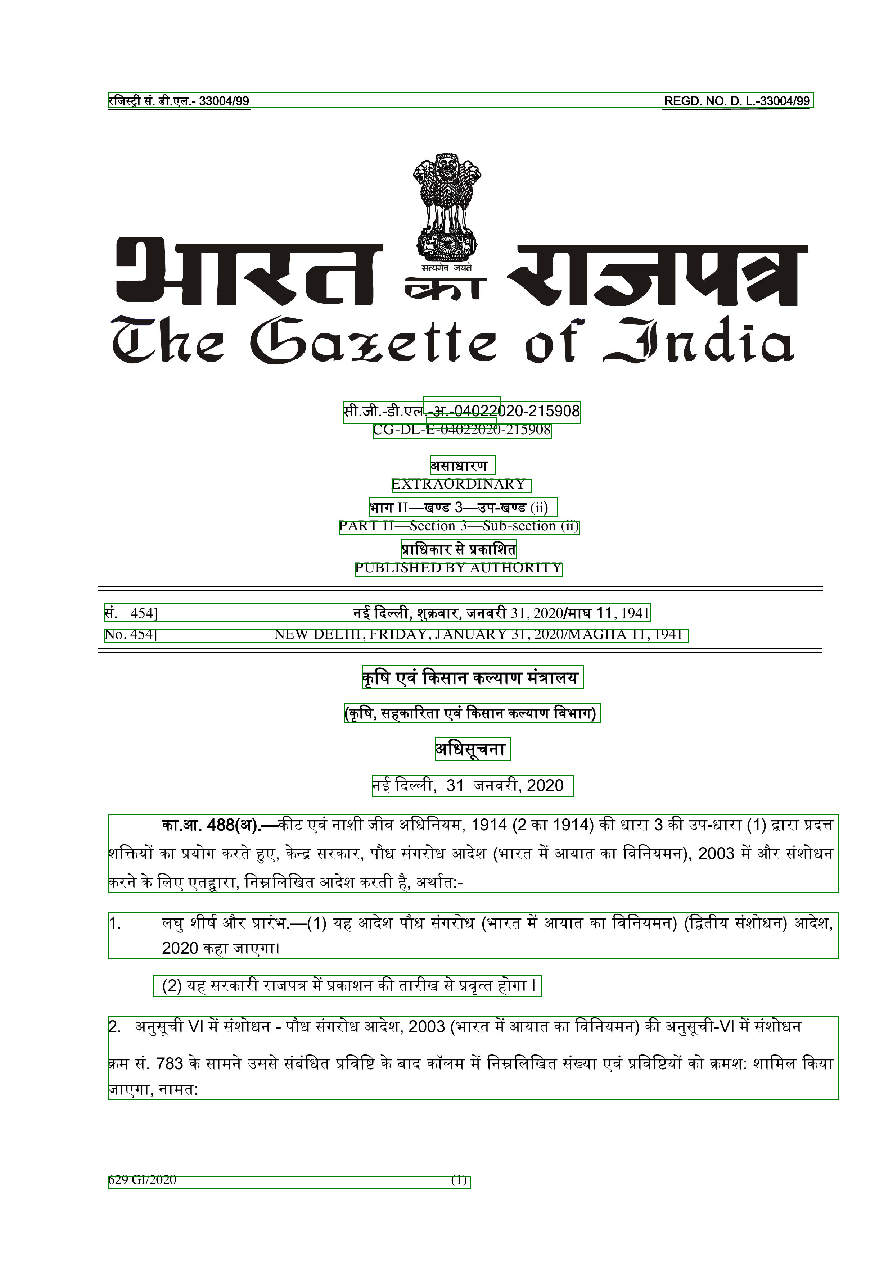

In [44]:
draw_box(img_filepath, page_width, page_height, p_df, color='green')

In [ ]:
def transform_dataframe(df):
    for index, row in df.iterrows():
        